In [1]:
#Import of libraries
import pandas as pd
import numpy as np

In [2]:
#Import of data
df = pd.read_csv('data_combined.csv')
df.head()

,Unnamed: 0,date_crawl,city,uid,book_date,price,event,rating,provider,source,...,conversation_rate,applause_rate,total_engagement,relevance,retweets_cum,likes_cum,replies_cum,retweets_cont,likes_cont,replies_cont
0,0,2023-03-30,La Palma,title_44546103,2023-05-20,90,True,4.78,privat,airbnb,...,0.055556,3.777778,95,gering,2.0,17.0,0.0,0.0,3.0,0.0
1,1,2023-03-30,La Palma,title_14832235,2023-05-20,86,True,4.78,privat,airbnb,...,0.055556,3.777778,95,gering,2.0,17.0,0.0,0.0,3.0,0.0
2,2,2023-03-30,La Palma,title_22183776,2023-05-20,63,True,4.90,privat,airbnb,...,0.055556,3.777778,95,gering,2.0,17.0,0.0,0.0,3.0,0.0
3,3,2023-03-30,La Palma,title_26944967,2023-05-20,109,True,4.76,privat,airbnb,...,0.055556,3.777778,95,gering,2.0,17.0,0.0,0.0,3.0,0.0
4,4,2023-03-30,La Palma,title_741718109680848267,2023-05-20,46,True,4.85,privat,airbnb,...,0.055556,3.777778,95,gering,2.0,17.0,0.0,0.0,3.0,0.0


In [3]:
#Data analysis
df.columns

Index(['Unnamed: 0', 'date_crawl', 'city', 'uid', 'book_date', 'price',
       'event', 'rating', 'provider', 'source', 'event_name', 'tweets',
       'retweets', 'likes', 'replies', 'amplification_rate',
       'conversation_rate', 'applause_rate', 'total_engagement', 'relevance',
       'retweets_cum', 'likes_cum', 'replies_cum', 'retweets_cont',
       'likes_cont', 'replies_cont'],
      dtype='object')

In [4]:
#Data cleaning
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('event_name', axis=1, inplace=True)
df.drop('uid', axis=1, inplace=True)

In [5]:
#Feature engineering
df['book_date'] = df['book_date'].astype('datetime64[ns]')
df['date_crawl'] = df['date_crawl'].astype('datetime64[ns]')
df['year'] = df['book_date'].dt.year
df['month'] = df['book_date'].dt.month
df['day'] = df['book_date'].dt.day
df['year_crawl'] = df['date_crawl'].dt.year
df['month_crawl'] = df['date_crawl'].dt.month
df['day_crawl'] = df['date_crawl'].dt.day
df.drop('book_date', axis=1, inplace=True)
df.drop('date_crawl', axis=1, inplace=True)

In [6]:
#get dummies for categorical variables city
df = pd.get_dummies(df, columns=['city'], drop_first=True)
df = pd.get_dummies(df, columns=['event'], drop_first=True)
df = pd.get_dummies(df, columns=['provider'], drop_first=True)
df = pd.get_dummies(df, columns=['source'], drop_first=True)
df = pd.get_dummies(df, columns=['relevance'], drop_first=True)

In [7]:
df.drop('retweets', axis=1, inplace=True)
df.drop('likes', axis=1, inplace=True)
df.drop('replies', axis=1, inplace=True)
df.drop('amplification_rate', axis=1, inplace=True)
df.drop('conversation_rate', axis=1, inplace=True)
df.drop('applause_rate', axis=1, inplace=True)
df.drop('tweets', axis=1, inplace=True)
df.drop('retweets_cum', axis=1, inplace=True)
df.drop('likes_cum', axis=1, inplace=True)
df.drop('replies_cum', axis=1, inplace=True)
df.drop('retweets_cont', axis=1, inplace=True)
df.drop('likes_cont', axis=1, inplace=True)
df.drop('replies_cont', axis=1, inplace=True)

RMSE: 292.37062008451824
R2: 0.3178097883452904


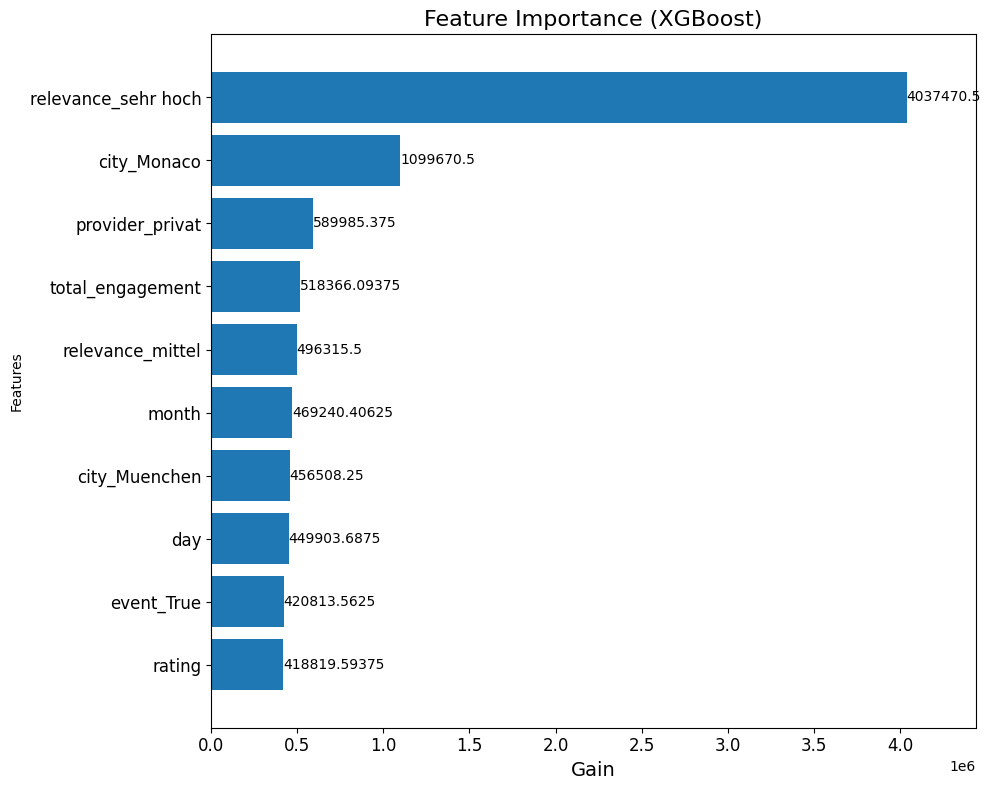

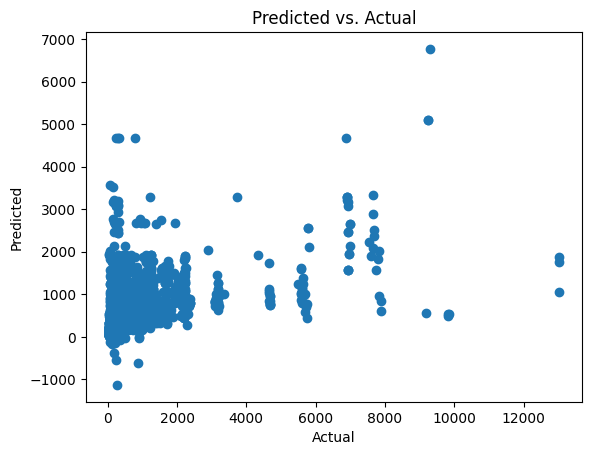

In [9]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Create linear regression object
regr_XGB = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=12, max_depth=8, subsample=0.7, colsample_bytree=0.3)

# Train the model using the training sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
regr_XGB.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr_XGB.predict(X_test)

# Show RMSE, R2
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 8))  # Anpassung der Größe des Plots
xgb.plot_importance(regr_XGB, height=0.8, importance_type='gain', xlabel='Gain', title='Feature Importance (XGBoost)', ax=ax, grid=False, max_num_features=10)  # max_num_features auf 10 setzen
plt.yticks(fontsize=12)  # Anpassung der Schriftgröße der y-Achse
plt.xticks(fontsize=12)  # Anpassung der Schriftgröße der x-Achse
plt.title('Feature Importance (XGBoost)', fontsize=16)  # Anpassung der Schriftgröße des Titels
plt.xlabel('Gain', fontsize=14)  # Anpassung der Schriftgröße der x-Achsenbeschriftung
plt.tight_layout()  # Optimierung des Layouts für bessere Darstellung
plt.show()

# Plot predicted vs. actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual')
plt.show()


RMSE: 341.27178426385416
R2: 0.09897274460751881
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     627.6
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:24:14   Log-Likelihood:            -1.0312e+06
No. Observations:              142046   AIC:                         2.063e+06
Df Residuals:                  142022   BIC:                         2.063e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

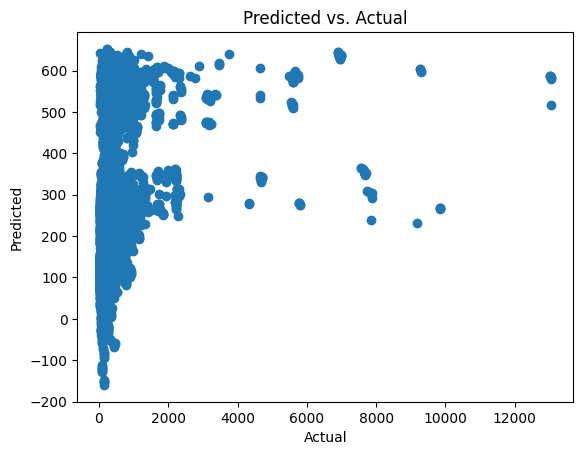

In [14]:
from statsmodels import api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression with statsmodels
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_train = sm.add_constant(X_train) # adding a constant
X_test = sm.add_constant(X_test) # adding a constant
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

# Show RMSE, R2
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

print_model = model.summary()
print(print_model)

# Plot predicted vs. actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual')
plt.show()


RMSE: 313.54610366840245
R2: 0.2394286205674565


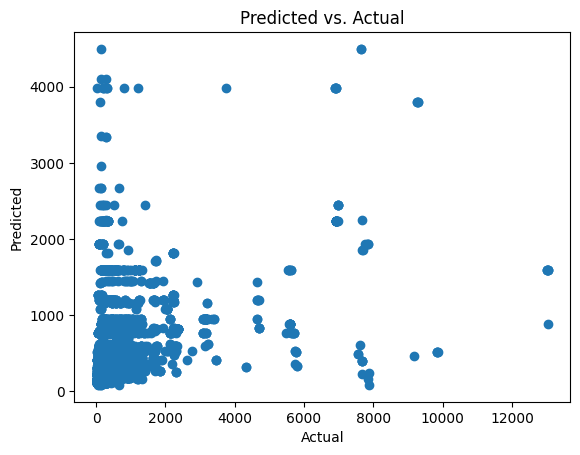

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr_tree = DecisionTreeRegressor(max_depth=8, random_state=12)

# Train the model using the training sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
regr_tree.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr_tree .predict(X_test)

# Show RMSE, R2
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

# Plot predicted vs. actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual')
plt.show()




In [ ]:
import pickle

# save the trained model to a file using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(regr_XGB, f)

In [ ]:
# DF für Prediction in einer neuen CSV-Datei speichern
df.to_csv('xgb_data.csv', index=False, encoding='utf-8-sig', sep=',')